# Lab 07 - Frame Synchronization and Non-coherent Demodulation

## Purpose

The purpose of this lab is to introduce non-coherent demodulation and frame synchronization.

## Outline
* Develop an algorithm for preamble detection using cross-correlation.
* Develop an algorithm for non-coherent demodulation of baseband OOK symbols by comparing energies. 
* Integrate and unit test the Frame Synchronization block
* Integrate and unit test the Non-Coherent Demodulation block
* Test and optimize the system

## Exercises


### Exercise 7.1: Develop an algorithm for preamble detection

Summary: In this exercise we explored the frame detection and synchronization process. To do this we observed how the peaks of cross-correlation (convolution) help determine the location of a random (known) sequence placed at a random (known) location in a bigger unknown sequence.


* Final edited code block (including the function:
    - Screenshot of the plot showing one distinct peak (you can repeat this exercise till you find one distinct peak).
    - Also included the two printed statements in the screenshot for actual verification.


Obtained peak location:  18
Exact starting point:  18


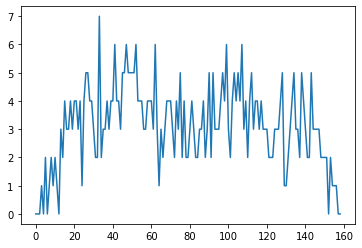

In [7]:
# for frame synchronization using match filtering (cross-correlation)

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
#This function performs the crosscorrelation / matched-filtering based frame sychronization by
#match filtering the received, zero-mean / ac-coupled data with the matched filter response
#The output is the corrcorrelation / Matched filtering result that is then fed to the peak search
#function which returns the location(s) of the payload beginning

#Input:
# data_bb_ac: Zero-mean input data that contains the preamble(s)
# known_preamble_ac: This array contains samples of the known preamble

#Output:
# crosscorr: Result of the matched filtering

def frame_sync(data_bb_ac, known_preamble_ac):
        
        #Generate the matched filter response by time-inversing the known preamble
        #Hint: You may find np.flip() helpful
        matched_filter_coef = np.flip(known_preamble_ac)
        #Use the matched filter to filter the input data for MF/crosscorrelation-based preamble detection
        #Hint you may find signal.fftconvolve() helpful
        crosscorr = signal.fftconvolve(data_bb_ac, matched_filter_coef)

        return crosscorr

# generate random binary preamble sequence (of size 16 preferably) using np.random.randint function

preamble = np.random.randint(2, size = 16)

# generate a random bit sequence for payload in the same way (of size 128 preferably)

payload = np.random.randint(2, size = 128) 

# pick a random index of payload (keep in mind its size) for the preamble sequence to be placed at

start_index = np.random.randint(128)

# now insert the preamble sequence at that very index using np.insert function

final_payload = np.insert(payload, start_index, preamble) 


# matched filtering

crosscorr = frame_sync(final_payload, preamble) ##### REVIEW!!

plt.plot(crosscorr) # plot the result to visualize the peak

peak = np.argmax(crosscorr) - len(preamble) + 1 # detemine the exact location of the peak using numpy func

# to verify if the peak location matches the predetermined random index
print('Obtained peak location: ', peak)
print('Exact starting point: ', start_index)

* Why do you think the peak in the plot is not exactly located at the starting index? (Hint: review the process of convolution of discrete valued sequences)

The peak in the plot is not exactly at the starting index; it is a couple to the right. This is because when doing convolution of discrete valued sequences, x[k-n] corresponds to a right hand shift of x[n] for positive k. 

Observations/Conclusions: The goal of this exercise is to detect the arrival of the data frame and determine the approximate frame starting position. We successfully detected the crosscorrelated peaks at loaction 18.


### Exercise 7.2: Develop an algorithm for non-coherent demodulation of baseband OOK symbols

Summary: The goal of this code is to determine what the received sequence of bits will be. A randomly generated binary sequences is corrupted with Gaussian noise. To recover the original message, we calculated the energy in each sample and implemented a decision device to determine whether each bit should be a 1 or a 0. 


* Final edited code block and screenshot that shows that the generated and detected bit sequence match each other.
 
Starting with OSF as 4 and SNR as 10 (10 dB):


In [8]:
import numpy as np

osf = int(input('Enter the oversampling factor: '))
snr = float(input('Enter the Signal to Noise Ratio: ')) # vary this value and run the simulation again

# generate random binary key sequence (of size 8 preferably) using np.random.randint function

data = np.random.randint(2, size = 8) 

# create a sampled version by repeating the bits according to the oversampling factor using np.repeat function

samples = np.repeat(data, osf) # oversampling that doesn't insert 0's

# corrupt the samples using Gaussian noise (Completed for the sake of simplicity)

# Note: energy in the samples remain the same only the noise variance gets divided by the SNR value

noisy_samples = samples + np.random.normal(loc = 0, scale = np.sqrt(1/snr), size = len(data)*osf)


# computing the threshold


# calculate the energy in each sample (square of value) np.square

energy_samples = np.square(noisy_samples) # power

# set the threshold as average energy per symbol (oversampled bit) np.sum

thresh = np.sum(energy_samples)/len(data)

# detecting bit (decision device)

detect_bits = np.zeros(len(data), dtype = int)

print(thresh)
for i in range(len(data)): 
        #a = noisy_samples[i:i + 4]
        sym_energy =  np.sum(np.square(noisy_samples[i*osf:(i+1)*osf])) # compute energy over each symbol not each bit (consider oversampling factor) np.sum
        if sym_energy > thresh: 
                detect_bits[i] = 1 # detect the particular data bit value if energy is > threshold
        
        #i = i + 4
        #print(sym_energy)
#print(energy_samples)

# verifying result                
print('Random Message: ', data)               
print('Detected Message: ', detect_bits)

Enter the oversampling factor: 4
Enter the Signal to Noise Ratio: 10
2.3561942745214077
Random Message:  [1 1 0 0 0 1 0 1]
Detected Message:  [1 1 0 0 0 1 0 1]


Now try to change these values, say OSF = 6 or 8 and SNR = -5,0,-5 dB:

In [11]:
import numpy as np

osf = int(input('Enter the oversampling factor: '))
snr = float(input('Enter the Signal to Noise Ratio: ')) # vary this value and run the simulation again

# generate random binary key sequence (of size 8 preferably) using np.random.randint function

data = np.random.randint(2, size = 8) 

# create a sampled version by repeating the bits according to the oversampling factor using np.repeat function

samples = np.repeat(data, osf) # oversampling that doesn't insert 0's

# corrupt the samples using Gaussian noise (Completed for the sake of simplicity)

# Note: energy in the samples remain the same only the noise variance gets divided by the SNR value

noisy_samples = samples + np.random.normal(loc = 0, scale = np.sqrt(1/snr), size = len(data)*osf)


# computing the threshold


# calculate the energy in each sample (square of value) np.square

energy_samples = np.square(noisy_samples) # power

# set the threshold as average energy per symbol (oversampled bit) np.sum

thresh = np.sum(energy_samples)/len(data)

# detecting bit (decision device)

detect_bits = np.zeros(len(data), dtype = int)

print(thresh)
for i in range(len(data)): 
        #a = noisy_samples[i:i + 4]
        sym_energy =  np.sum(np.square(noisy_samples[i*osf:(i+1)*osf])) # compute energy over each symbol not each bit (consider oversampling factor) np.sum
        if sym_energy > thresh: 
                detect_bits[i] = 1 # detect the particular data bit value if energy is > threshold
        
        #i = i + 4
        #print(sym_energy)
#print(energy_samples)

# verifying result                
print('Random Message: ', data)               
print('Detected Message: ', detect_bits)

Enter the oversampling factor: 6
Enter the Signal to Noise Ratio: 5
2.8988446042532585
Random Message:  [0 1 0 0 1 0 0 0]
Detected Message:  [0 1 0 0 1 0 0 0]


<FONT COLOR="red">Now try to change these values, say OSF = 6 or 8 and SNR = -5,0,-5 dB and save the screenshots showing whether the bit sequences match. Point here is to make you realize that we are not performing detection over one noisy sample but osf number of noisy samples that are used to represent a bit. Please include a brief comment about your observations (does not have to be perfect).
    
    
    -Our code does not allow SNR as negatives or 0

Observations/Conlusions: Several different noisy samples correspond to 1 bit, and by taking the average energy of these samples, we can compare it to the threshold to determine if the received bit should be a 1 or a 0.  For example when OSF = 4, we are examining energies from 4 samples and comparing that to threshold. The output from our code shows that the randomly generated binary message and the detected message are the same. 

### Exercise 7.3: Integrate and test the frame synchronization algorithm

Summary: In this exercise, we extend Exercise 7.1 to include the frame_sync function. The function performs the cross correlation / matched-filtering based frame synchronization by match filtering the received, zero-mean / ac-coupled data with the matched filter response. The output is the crosscorrelation / Matched filtering result that is then fed to the peak search function which returns the location(s) of the payload beginning.


In [3]:
import numpy as np
### Exercise begins
from scipy import signal
#This function performs the crosscorrelation / matched-filtering based frame sychronization by
#match filtering the received, zero-mean / ac-coupled data with the matched filter response
#The output is the corrcorrelation / Matched filtering result that is then fed to the peak search
#function which returns the location(s) of the payload beginning

#Input:
# data_bb_ac: Zero-mean input data that contains the preamble(s)
# known_preamble_ac: This array contains samples of the known preamble

#Output:
# crosscorr: Result of the matched filtering

def frame_sync(data_bb_ac, known_preamble_ac):
        
        #Generate the matched filter response by time-inversing the known preamble
        #Hint: You may find np.flip() helpful
        matched_filter_coef = np.flip(known_preamble_ac)
        #Use the matched filter to filter the input data for MF/crosscorrelation-based preamble detection
        #Hint you may find signal.fftconvolve() helpful
        crosscorr = signal.fftconvolve(matched_filter_coef, data_bb_ac)

        return crosscorr

# Before conducting the crosscorrelation-based packet detection, we convert 
# the samples to the baseband envelope.

framesync_data = np.load('framesync_data.npz') # load

data_bb_ac = framesync_data['data_bb_ac']
known_preamble_ac = framesync_data['known_preamble_ac']
crosscorr_desired = framesync_data['crosscorr']

# Pass the received AC-coupled data samples to the matched filter
# Hint 1: The variable "matched_filter_coef" stores the impulse response of 
# the matched filter (matched to the preamble sequence samples)
# Hint 2: You may find "fftconvolve" or "convolve" functions helpful from 
# scipy.signal library

crosscorr = frame_sync(data_bb_ac, known_preamble_ac)

crosscorr = crosscorr[0:len(crosscorr_desired)]

### Exercise ends

# compare the crosscorr with the desired crosscorr
print('Checking whether the outputs match: ', np.array_equal(crosscorr, crosscorr_desired, equal_nan=False))

Checking whether the outputs match:  True


Observations/Conlusions: Lengths were not originally matching so we kept receiving false results. By added another line (crosscorr = crosscorr[0:len(crosscorr_desired)]) to match lengths, we were able to get a true result.


### Exercise 7.4: Integrate and test the noncoherent demodulation algorithm

Summary: In this exercise, we extend Exercise 7.2 to include the noncoherent demodulation function. 

In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import signal


# Define the demodulation function


# The demodulation function takes the following arguments as inputs:

# a_in1:                        This array contains the received samples to be demodulated, samples 
# here include both the preamble and the payload.

# samples_perbit:               This is the oversampling factor on the receiver side 
# (= 4/3*oversampling factor of the transmitter), each symbol you would like to demodulate is 
# represented by "samples_perbit" bits

# payload_start:                This is the index of the received samples that indicates the beginning
# of the payload. For example, if an array "a_in1" contains both the preamble and payload, the 
# a_in1[payload_start] should be the first sample of the payload

# N:                            This value is equal to the length of the payload in bits.

# Ts_in:                        This is the ADC input sampling period in sec, Ts_in = 1/fs_in


#The demodulation function returns the following arguments as outputs:

# a_demodulated                 This is the bit array containing the demodulated payload


# Note: Wireless channel noncoherent demodulation of OOK signals requires both I,Q data as power that 
# was originally only in I could leak into Q channel as a result of the carrier freq & phase offset
                
def noncoherent_demodulation_wireless(a_in1, samples_perbit, payload_start, N, fs_in, Ts_in):

        
        payload = a_in1[payload_start:(payload_start + N*samples_perbit)]
        
        payload_energy = np.square(np.abs(payload))
    
        # General Idea for Noncoherent Demodulation:

        
        # Noncoherent detection (also known as energy detection) of the data does not ultilize the 
        # phase information of the received signal.
        
        # It instead focuses on the magnitude of the received data to make a decision on the 
        # transmitted bits/symbols.
        
        # One possible approach is to- compute the total energy of all samples corresponding to a 
        # bit/symbol and then compare the bit/symbol energy with a threshold to determine if the 
        # transmitted OOK bit/symbol is 1 ("on") or 0 ("off"). 
 

        # The steps are outlined below:

    
        ## Step 1: Obtain the threshold used to for determining the OOK symbol
        
        # One reasonable choice of such threshold is the long term average energy per symbol

        # 1.a: Extract a small segement of samples from the original received sample sequence 
        # (e.g., samples corresponding to 1000 bit from the beginning of the payload)

        payload_energy_segment = payload_energy[0:999]

        # 1.b: Compute the long term average energy per symbol
        
        # Hint: Note that each sample is complex-valued, you may find np.square, np.abs, np.mean 
        # helpful. Your script should return a single threshold value at the end of this block.

        average_energy_per_symbol = np.mean(payload_energy_segment)*samples_perbit
        
        
        ## Step 2. Demodulate the received signal to recover the transmitted bits
        
        symbol_energy = np.mean(payload_energy.reshape(-1, samples_perbit), axis=1)
        
        # 2.a: Initialize an array (with current size) for storing all bits recovered
        bits_demodulated = np.zeros(N,dtype=int)

        for symbol_index in range(N):
        # 2.b: Compute the energy for each received bit/symbol by adding up the energy of all samples 
        # correspoinding to that bit.
                current_symbol_energy = samples_perbit*symbol_energy[symbol_index]
        #2.c: Compare each bit's energy with the threshold to make a decision on the transmitted bit 
        # being "1" or "0".
                if(current_symbol_energy > average_energy_per_symbol):
                        bits_demodulated[symbol_index] = 1 # decision threshold
               
        return bits_demodulated
    
noncoherent_demod = np.load('noncoherent_demod.npz') # load

data = noncoherent_demod['data']
samples_perbit = noncoherent_demod['samples_perbit']
payload_start = noncoherent_demod['payload_start']
N = noncoherent_demod['N']
samp_freq = noncoherent_demod['fs_in']
samp_intv = noncoherent_demod['Ts_in']
demod_bits = noncoherent_demod['a_demodulated']

bits_demodulated = noncoherent_demodulation_wireless(data, samples_perbit, payload_start, N, samp_freq, samp_intv)

print(np.array_equal(demod_bits, bits_demodulated, equal_nan=False)) # comparison

True


Observations/Conlusions: In non coherent systems, the receiver do not need the phase information of the transmitter carrier to recover the signal. This module uses the magnitude of the received data to make a decision on the transmitted bits/symbols. The transmitted OOK bit/symbol state can be determined if the function returns 1 ("on") or 0 ("off").

### Exercise 7.5: Testing and Verification of the system

Summary: In the final exercise we test and verify the system by checking the BER. First we need to calibrate the system on the transmit and receive side and ensure that the IQ gain ratio is around 1. One the system was calibrated we observed whether the long term BER is zero or if we needed to reduce the distance and repeat the exercise.

* Wired Case:

SMA connection IQ gain = 1.0

BER = 0

<img src="Wired.jpeg" width="400" height="300">

* Wireless Case:

IQ gain = 0.999

BER = 0
<img src="Wireless.png" width="400" height="300">

Observations/Conlusions: The Bit Error Ratio (BER) is used determine the quality of a digital communication system. As an extension of Lab 02, BER is calculated by comparing the transmitted sequence of bits to the received bits and counting the number of errors. Our BER tests wired communication system was much easier and we were able to acheive a 0 error rate on the first or second try. The BER test for the wireless communication took numerous trial and errors to make sure the atennas were orienties the same way, same height, and a close distance. During this exercise we had to try several different antennas before we were finally successful.

## Reflections

A reflection should be included after each lab that you do in this class.  Place this reflection in your lab notebook, directly after the completed lab with questions.  In your reflection, you should include a detailed answer to several (>= 4) of the questions that are listed below.  You may add anything else that you think is relevant as well.

Questions to consider as you do your reflection:

1.	What are you being asked to do and why?
2.	What do you think about what you see and do?
3.	What questions do you have about what you are being asked to observe, research, or do?
4.	What new ideas and questions are you asking yourself related to the activity?  What else do you know?  What questions do you have that you would like to answer by developing an experiment?
5.	What did you accomplish today?
6.	What are the investigations that you are doing?
7.	What questions are you trying to answer?
8.	What procedures did you use to answer the question?
9.	What did you learn as a result from experimenting?
10.	What can you conclude as a result of your experiments/investigations?  Use evidence to support your conclusion.
11.	How are my conclusions you drew different from what you had thought prior to the investigation?
12.	What is your opinion of what you did in the experiment?
13.	What did you contribute?  What do you wish you contributed but were not able?  What kept you from being able to contribute the way you would have liked to?
14.	What really worked for you?  Why?
15.	What was not so successful for you?  Why?
16.	What would you like to improve upon?  How can you make these changes?
17.	How is what you are doing relevant to what you are learning?
18.	What else would you like to explore?  What if you had done one thing differently?  How would that have affected events?  Be specific.
19.	How can you relate this to the real world?  Give specific examples where this information can be useful.

Note: When you are finished with your work, you may delete these instructions from the notebook before submitting.

### Reflection 6.1 Megan Riley

* What are you being asked to do and why?

In Lab 07, we experimented and observed non-coherent demodulation and frame synchronization. The first step of this process was to develop an algorithm for preamble detection using cross-correlation. Frame arrival detections allow us to detect a data frame's arrival and approximate the frame starting position. Then we developed an algorithm for non-coherent demodulation of baseband OOK symbols by comparing energies. The function allowed us to determine what the received sequence of bits will be from several different noisy samples corresponding to 1 bit, and by taking the average energy of these samples, we can compare it to the threshold to determine if the received bit should be a 1 or a 0. In the third exercise, we integrate and unit test a frame synchronization block. The frame synchronization output returns the location(s) of the payload beginning. Then we integrate and unit test the non-coherent demodulation block. The output will return the transmitted OOK bit/symbol state, which determines if the signal is on or off. In the final exercise, we test and verify the system by checking the BER to determine the quality of the communication system, where 0 indicates no errors. 

* What really worked for you? Why?

Our PLL worked perfectly! During this lab, I choose the role of the scroll to take notes for the team. During this lab activity, I made notes and recorded each attempt so that we could easily complete our lab notebook. This week we created a new repository for our lab report to record notes, ensuring that we did not run into any errors of corrupted files. Before, we were taking notes on google drive, so we had to spend a lot of time drafting a lab report and transferring our results. We will definitely use this method again next week.

* What was not so successful for you? Why?

We again had a lot of issues with GitHub and Jupyter notebook. During the lab, we committed our code after each exercise but once the lab was over all of our commits were unsaved. I had to go back and figure out how to restore a checkpoint.

* How can you relate this to the real world? Give some examples where this information might be useful?

Similar processes that we performed in the lab are used for signal detection in the real world. Although our demonstration simplifies the model and assumes non-idealities (hardware such as I, Q imbalance, and DC offsets presented in the final received signal) were taken care of by the software calibration and pre-processing process. The real-world applications start with frame synchronization to detect the preamble sequence and use the preamble to help us identify the boundary between the preamble and the rest of the packets. And then, they can perform the non-coherent demodulation and decoding of the header and the payload portion of the packet.

### Reflection 6.2 Verlee Richey

What did you accomplish today?

For this lab we implemented the mathematical formulas for receiving signals using Python. In exercise 1, we wrote a code to detect the preamble. We implemented a matched filter using cross correlation and then plotted the peaks. The peaks were approximately at the start of the preamble. In exercise 2, we wrote a code for demodulating OOK symbols. After computing the average energy of noisy samples corresponding to 1 bit, we compared the energy to the threshold to determine if the mostly likely transmitted bit was a 1 or a 0. In exercise 3, we tested our logic from exercise 1 to see if it could detect a known preamble rather than a random sequence. In exercise 4, we tested our logic from exercise 2 to see if it could accurately demodulate a signal. In exercise 5, we set up wired/wireless communication systems and tried to obtain a bit error rate of 0 for both setups. 

What really worked for you? Why?

Guoyue kindly tested some PLLs for us before lab started this week and gave us new ones, so for the first time ever we did not have PLL problems. Also, our group has really found a groove with backing up data. I created a separate repository on my laptop so I could start working on the lab report and formatting it while we were still in lab. This reduced the amount of time we had to spend formatting after we were done with lab. 

What was not so successful for you? Why?

Despite us being super careful to not overwrite each other's work, we almost lost all of our coding progress because of Jupyter notebook. Thankfully Megan figured out how to restore a previous version. Also, we really struggled with getting the wireless setup to work. A lot of time was spent trying to mess with the computer/setup when in reality there was an issue with the power connections. Unfortunately even after we got that fixed, getting a BER of 0 took a ton of trial and error while changing nothing, which was frustrating. In the end we borrowed another group's antennas. 

How is what you are doing relevant to what you are learning?

The first half of the class was largely about transmitting signals, and we have moved into how we can use mathematical formulas to model what is happening on the receive side of a communication system. We have particularly been focusing on the effects of noise. Since we model noise as white, nonzero, and Gaussian, we can use probability theory to detect what the most likely transmitted signal was after we obtain the received signal.  

### Reflection 6.3 Gabriel Quintero

How is what you are learning relevant to this lab?

We are learning about non-coherent demodulation in class. All the math we have demonstrated leads can be built upon this simple example. We kinda account for the non-idealities by convolving the correlation function with the frequency response of the non-idealities of the propagation channel. One of the parameters to be considered was a phase shift, and this lab allowed us to explore how to take into consideration propagation delays with our lab setup.

What is your opinion about what you did in your experiment?

I actually enjoyed the coding section for the most part. The math in the lecture is very dense, so it was satisfying to know that all of this can be synthesized into relatively simple algorithms. I also really enjoyed the fact that we were able to test our own algorithms. Props to whoever developed the coding exercises for the outputs. 

The hardware part was very frustrating. We couldn't get the wireless channel to work. Hopefully it was only an issue with the antennas.

What else would you like to explore?

I would love to explore the numerical side of frequency shifting using Python. I think I would also enjoy learning about how to make a variable gain amplifier work with what we have been learning, since voltage gain is crucial to making sure we are getting the right symbols.

How can you relate this to the real-world?

Propagation channels force communication engineers to keep more non-idealities in mind when designing their transmit and receive algorithms. On this lab we explored delay as a non-ideality, but in practice a real-world channel might also have a frequency shift, attenuation, and God knows what. One of the things I remember learning in a club project was the Doppler effect. I assume this effect is accounted for with the methods presented in class and lightly explored in-lab.